<a href="https://colab.research.google.com/github/Yashwati-patel/Face_Emotion_Recognition/blob/main/Face_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Introduction**

**Face Emotion Recognition**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms. Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms. One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge. In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention. Digital classrooms are conducted via video telephony software program (ex- Zoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to a lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analyzed using deep learning algorithms. Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analyzed and tracked.







## **Importing Libraries**

In [77]:
# importing libraries
import os
import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split

##For Models ##
import keras
import tensorflow as tf
from tensorflow.keras import optimizers
from keras.utils import np_utils
from keras.regularizers import l2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D, SeparableConv2D
from tensorflow.keras.layers import Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import models
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D,concatenate
from keras.models import Model
from tensorflow.keras import layers
from keras.applications.inception_v3 import InceptionV3
from keras.models import load_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [78]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Loading Datasets**

In [3]:
# Getting the Data-Set from kaggle
!wget https://www.kaggle.com/msambare/fer2013

--2022-05-08 02:29:21--  https://www.kaggle.com/msambare/fer2013
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘fer2013’

fer2013                 [ <=>                ]  14.32K  --.-KB/s    in 0s      

2022-05-08 02:29:21 (35.2 MB/s) - ‘fer2013’ saved [14659]



In [4]:
# Unzipping the dataset
!unzip  -q "/content/drive/MyDrive/CAPSTONE PROJECT-1/archive.zip"

In [5]:
#creating path from dataset
train_path=Path("/content/train")
CLASSES =[str(list(train_path.glob("*"))[i]).split('/')[-1] for i in range(len(list(train_path.glob("*"))))]
CLASSES

['disgust', 'happy', 'fear', 'sad', 'surprise', 'neutral', 'angry']

In [6]:
CLASSES=['surprise', 'disgust', 'neutral', 'sad', 'happy', 'fear', 'angry']

In [7]:
# Reading  image from dataset
img_happy=cv2.imread('/content/train/happy/Training_11149790.jpg')

In [8]:
# find dimension of the image
img_happy.shape

(48, 48, 3)

## **Display Image**

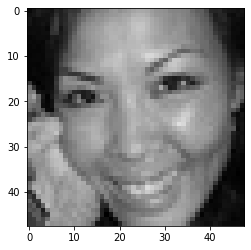

In [9]:
# displaying the image
plt.imshow(img_happy)

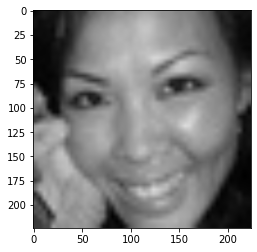

In [10]:
# resizing the image 
img_size=224
new_array=cv2.resize(img_happy,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
# convert the path to string type
path_list=list(map(lambda x: str(x), list(train_path.glob("*/*"))))

**Train The Model**

In [12]:
# loading the training data
training_data=[]
for path in path_list:
  img_array=cv2.imread(path)
  new_array=cv2.resize(img_array,(img_size,img_size))
  Class_label=CLASSES.index(path.split('/')[-2])
  training_data.append([new_array,Class_label])

In [13]:
# data suffling
import random
random.shuffle(training_data)
training_data=training_data[:2500]

In [14]:
ld=[]
for i in range(len(training_data)):
   ld.append(training_data[i][1])
np.unique(ld,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([286,  40, 437, 425, 654, 338, 320]))

In [15]:
# creating dependent and independent variable
X=[]
y=[]
for feature, label in training_data:
  X.append(feature)
  y.append(label)

In [16]:
# normalizing the data
X=np.array(X).reshape(-1,img_size,img_size,3)/255
y=np.array(y)

In [17]:
# loading the mobilenetv2 model to apply transfer learning
MODEL=tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [18]:
# Checking the structure of the model
MODEL.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [19]:
# setting our model input as input layer of mobilenetv2
Base_input=MODEL.layers[0].input

In [20]:
# taking the layer before final outpur in mobilenetv2
Base_output=MODEL.layers[-2].output

In [21]:
# adding two layer and then the last final layer where output correspond to number of class present in our problem i.e. 7

Final_Output=layers.Dense(128)(Base_output)
Final_Output=layers.Activation('relu')(Final_Output)
Final_Output=layers.Dense(64)(Final_Output)
Final_Output=layers.Activation('relu')(Final_Output)
Final_Output=layers.Dense(7,activation='softmax')(Final_Output)

In [22]:
# setting input and output layer of our new model
New_MODEL=keras.Model(inputs=Base_input,outputs=Final_Output)

In [23]:
# Checking the structure of new model
New_MODEL.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [24]:
# compiling the model
New_MODEL.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [25]:
# fitting the data in our model
New_MODEL.fit(X,y,epochs=20)

Epoch 1/20
79/79 [==============================] - 468s 6s/step - loss: 1.5503 - accuracy: 0.4180
Epoch 2/20
79/79 [==============================] - 463s 6s/step - loss: 1.2657 - accuracy: 0.5412
Epoch 3/20
79/79 [==============================] - 463s 6s/step - loss: 1.1356 - accuracy: 0.5832
Epoch 4/20
79/79 [==============================] - 461s 6s/step - loss: 0.9622 - accuracy: 0.6368
Epoch 5/20
79/79 [==============================] - 462s 6s/step - loss: 0.8857 - accuracy: 0.6828
Epoch 6/20
79/79 [==============================] - 463s 6s/step - loss: 0.7765 - accuracy: 0.7224
Epoch 7/20
79/79 [==============================] - 453s 6s/step - loss: 0.6830 - accuracy: 0.7656
Epoch 8/20
79/79 [==============================] - 452s 6s/step - loss: 0.5795 - accuracy: 0.7964
Epoch 9/20
79/79 [==============================] - 455s 6s/step - loss: 0.5247 - accuracy: 0.8196
Epoch 10/20
79/79 [==============================] - 454s 6s/step - loss: 0.5076 - accuracy: 0.8244
Epoch 11/

**Saving Model**

In [64]:
# saving the model 
New_MODEL.save('Modelweights.h5')

In [65]:
New_MODEL=tf.keras.models.load_model("/content/Modelweights.h5")

In [66]:
CLASSES=['angry', 'disgust','fear', 'happy','neutral', 'sad','surprise']

In [67]:
# Detect Emotion on Images
def image2emotion(img):
   Frame=cv2.imread(img)
   faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
   gray=cv2.cvtColor(Frame,cv2.COLOR_BGR2GRAY)
   faces=faceCascade.detectMultiScale(gray,1.1,4)
   for x,y,w,h in faces:
      roi_gray = gray[y:y+h,x:x+w]
      roi_color = Frame[y:y+h,x:x+w]
      cv2.rectangle(Frame,(x,y),(x+w,y+h),(255,0,0),2)
      Facess=faceCascade.detectMultiScale(roi_gray)
      if len(Facess)==0:
        print("face not detected")
      else:
        for (ex,ey,ew,eh) in Facess:
          face_roi=roi_color[ey:ey+eh,ex:ex+ew]
   Final_image=cv2.resize(face_roi,(img_size,img_size))
   Final_image=np.expand_dims(Final_image,axis=0)
   Final_image=Final_image/255
   predict=New_MODEL.predict(Final_image)
   label=CLASSES[np.argmax(predict)]
   label_position=(x-2,y-2)
   cv2.putText(Frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,255,255),2)
   plt.imshow(cv2.cvtColor(Frame,cv2.COLOR_BGR2RGB))
   plt.show()

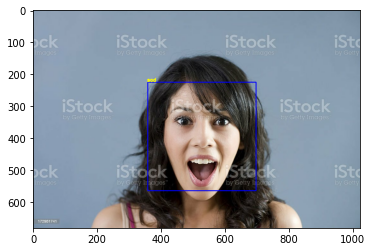

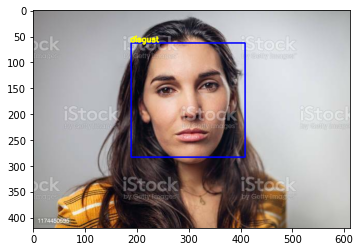

In [68]:
img="/content/drive/MyDrive/CAPSTONE PROJECT-1/emotion_1.jfif"
image2emotion(img)
img="/content/drive/MyDrive/CAPSTONE PROJECT-1/emotion_2.jfif"
image2emotion(img)

In [69]:
New_MODEL

In [70]:
# import libraries
from IPython.display import display, Javascript, Image,clear_output
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time

In [72]:
# Function To Convert The JavaScript Object Into An OpenCV Image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # Decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])

  # Convert Bytes To Numpy Array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  
  # Decode Numpy Array Into OpenCV BGR Image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# Function To Convert OpenCV Rectangle Bounding Box Image Into Base64 Byte 
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # Convert Array Into PIL Image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()

  # Format Bbox Into Png For Return
  bbox_PIL.save(iobuf, format='png')

  # Format Return String
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [73]:
# JavaScript to properly create our live video stream
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [74]:
# Detecting the face and emotion prediction with the live webcam feed 
def face_detect():
  import cv2
  from PIL import Image
  import numpy as np
  import os
  from keras.models import load_model
  from time import sleep
  from keras.preprocessing.image import img_to_array
  from keras.preprocessing import image


# Start Streaming Video From Webcam
  video_stream()

# Label For Video
  label_html = 'Capturing...'


# Initialze Bounding Box To Empty
  bbox = ''
  count = 0
  while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
      break

    # Convert JS Response To OpenCV Image
    
    Frame = js_to_image(js_reply["img"])
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    # Grayscale Image For Face Detection
    gray = cv2.cvtColor(Frame, cv2.COLOR_BGR2GRAY)
     # Get Face Region Coordinates
    Faces = faceCascade.detectMultiScale(gray)
    # Create Transparent Overlay For Bounding Box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
    # Get Face Bounding Box For Overlay
    for x,y,w,h in Faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      roi_gray = gray[y:y+h,x:x+w]
      roi_gray = cv2.resize(roi_gray,(img_size,img_size))
      Facess=faceCascade.detectMultiScale(roi_gray)
      if np.sum([roi_gray])!=0:
        roi_color=Frame[y:y+h,x:x+w]
        Final_image=cv2.resize(roi_color,(img_size,img_size))
        Final_image=np.expand_dims(Final_image,axis=0)
        Final_image=Final_image/255
        predict=New_MODEL.predict(Final_image)
        x1,y1,w1,h1=0,0,175,75
        label=CLASSES[np.argmax(predict)]
        label_position = (x,y)
        cv2.putText(bbox_array,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2) 
      else:
        cv2.putText(bbox_array,'No Faces',(30,80),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # Convert Overlay Of Bbox Into Bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # Update Bbox So Next Frame Gets New Overlay
    bbox = bbox_bytes

In [76]:
# Detecting emotion via webcam
face_detect()

<IPython.core.display.Javascript object>

**Conclusion**

The model which was created by CNN layers gave accuracy of 87%. I have used streamlitwebrtc which helped to deal with real-time video streams. Image captured from the webcam is sent to VideoTransformerfunction to detect the emotion.

The application is able to detect face location and predict the right expression while checking it on a local webcam.

As a result, we save this resnet model and use it to predict facial expressions.
Since, the emotion counts of disgust and surprise images are less therefore on local webcam it hardly detect those emotions.

Our github repository contains the code we used to create a web application using Streamlit and deploy it on Heroku.


